<a href="https://colab.research.google.com/github/ahmedyasser7/DEPI_GP/blob/main/ACCIDENT_SEVERITY_PREDICTIVE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACCIDENT SEVERITY PREDICTIVE MODEL**

# Uploading The Dataset



In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

Saving accident cleaned data.csv to accident cleaned data.csv


# Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



#Loading the Data

In [27]:
# Load the 'accident cleaned data.csv' dataset
df =  pd.read_csv('/content/accident cleaned data.csv')

# Check the first few rows
df.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200901BS70001,-0.201349,51.512273,2,2,1,2009-01-01,5,15:11:00,12,E09000020,30,1,1,1,0,1
1,200901BS70002,-0.199248,51.514399,2,2,11,2009-01-05,2,10:59:00,12,E09000020,30,1,1,2,0,1
2,200901BS70003,-0.179599,51.486668,3,2,1,2009-01-04,1,14:19:00,12,E09000020,30,1,1,1,0,1
3,200901BS70004,-0.203110,51.507804,2,2,1,2009-01-05,2,08:10:00,12,E09000020,30,1,8,4,0,1
4,200901BS70005,-0.173445,51.482076,2,2,1,2009-01-06,3,17:25:00,12,E09000020,30,4,1,1,0,1


#Exploring & Preprocessing the Data

In [28]:
# Check for missing values
df.isnull().sum()

,0
Accident_Index,0
Longitude,0
Latitude,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,0
Local_Authority_(District),0


In [29]:
# Check for duplicate values
df.duplicated().sum()

0

In [30]:
print(df.shape)

(898555, 17)


In [31]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898555 entries, 0 to 898554
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              898555 non-null  object 
 1   Longitude                   898555 non-null  float64
 2   Latitude                    898555 non-null  float64
 3   Accident_Severity           898555 non-null  int64  
 4   Number_of_Vehicles          898555 non-null  int64  
 5   Number_of_Casualties        898555 non-null  int64  
 6   Date                        898555 non-null  object 
 7   Day_of_Week                 898555 non-null  int64  
 8   Time                        898555 non-null  object 
 9   Local_Authority_(District)  898555 non-null  int64  
 10  Local_Authority_(Highway)   898555 non-null  object 
 11  Speed_limit                 898555 non-null  int64  
 12  Light_Conditions            898555 non-null  int64  
 13  Weather_Condit

we will:
- drop (Accident_Index, Date, Time) as they don't contribute to predicting "Accident Severity".
- Keep all the other columns.
- Encode categorical columns like Local_Authority_(Highway) using One-Hot Encoding.


## Drop Irrelevant Columns

In [32]:
# Drop irrelevant columns
df = df.drop(['Accident_Index', 'Date', 'Time','Local_Authority_(Highway)'], axis=1)

## Check for Numeric Features

In [33]:
# Check if all features are numeric
print(df.dtypes)

Longitude                     float64
Latitude                      float64
Accident_Severity               int64
Number_of_Vehicles              int64
Number_of_Casualties            int64
Day_of_Week                     int64
Local_Authority_(District)      int64
Speed_limit                     int64
Light_Conditions                int64
Weather_Conditions              int64
Road_Surface_Conditions         int64
Special_Conditions_at_Site      int64
Urban_or_Rural_Area             int64
dtype: object


In [34]:
# Convert boolean columns to integers (0 and 1)
df = df.astype(int)  # Convert all columns to int, ensure they are all numeric

In [35]:
# Check the data types after conversion
print(df.dtypes)

Longitude                     int64
Latitude                      int64
Accident_Severity             int64
Number_of_Vehicles            int64
Number_of_Casualties          int64
Day_of_Week                   int64
Local_Authority_(District)    int64
Speed_limit                   int64
Light_Conditions              int64
Weather_Conditions            int64
Road_Surface_Conditions       int64
Special_Conditions_at_Site    int64
Urban_or_Rural_Area           int64
dtype: object


## Handling Class Imbalance


In [36]:
accident_severity_counts = df['Accident_Severity'].value_counts()
accident_severity_counts

,count
Accident_Severity,
3,763607
2,124471
1,10477


In [37]:

# Adjusting the target variable to start from 0
df['Accident_Severity'] = df['Accident_Severity'] - 1  # Convert 1, 2, 3 to 0, 1, 2

# Model Selection & Training

#Train-Test Split

In [38]:
# Split the dataset into features and target variable
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Feature Scaling

In [39]:

# Initialize the StandardScaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define the Evaluation Functions

In [40]:
# Function to calculate accuracy
def calculate_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Function to generate classification report
def generate_classification_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to generate confusion matrix
def generate_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)

# Mapping function to convert numerical labels to string labels
def map_predictions(y):
    return ['Slight' if x == 1 else 'Serious' if x == 2 else 'Fatal' for x in y]

#Initialize Models and Hyperparameters

In [41]:
# Model definition
models = {
    'Decision Tree': (DecisionTreeClassifier(max_depth=10, min_samples_split=10), {})
}

## Perform Randomized Search CV for the Model


In [42]:
# Initialize dictionaries to store evaluation results
evaluation_results = {}

# Train Models with Randomized Search
for model_name, (model, params) in models.items():
    print(f"Training {model_name} with Randomized Search...")

    # Initialize RandomizedSearchCV
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=20,
                                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

    # Fit Randomized Search
    randomized_search.fit(X_train_scaled, y_train)

    # Best parameters and best score
    best_params = randomized_search.best_params_
    best_score = randomized_search.best_score_
    print(f"Best cross-validated accuracy for {model_name}: {best_score:.4f}")

    # Evaluate the best model
    best_model = randomized_search.best_estimator_

    # Calculate accuracy using the helper function
    accuracy = calculate_accuracy(best_model, X_test_scaled, y_test)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Generate classification report
    classification_report_dict = generate_classification_report(best_model, X_test_scaled, y_test)
    print(f"Classification Report for {model_name}:\n", pd.DataFrame(classification_report_dict).T)

Training Decision Tree with Randomized Search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best cross-validated accuracy for Decision Tree: 0.8487
Decision Tree Accuracy: 0.8497
Classification Report for Decision Tree:
               precision    recall  f1-score        support
0              0.136364  0.001442  0.002854    2080.000000
1              0.284866  0.003872  0.007640   24795.000000
2              0.850897  0.998521  0.918817  152836.000000
accuracy       0.849748  0.849748  0.849748       0.849748
macro avg      0.424042  0.334612  0.309770  179711.000000
weighted avg   0.764530  0.849748  0.782499  179711.000000


In [43]:
    # Calculate predictions
    y_pred = best_model.predict(X_test_scaled)

    # Map predictions and true labels to string labels
    y_test_mapped = map_predictions(y_test + 1)  # Increment to revert to original labels (1, 2, 3)
    y_pred_mapped = map_predictions(y_pred + 1)

    # Print data types for debugging
    print(f"Data types: y_test_mapped = {type(y_test_mapped)}, y_pred_mapped = {type(y_pred_mapped)}")

Data types: y_test_mapped = <class 'list'>, y_pred_mapped = <class 'list'>


Decision Tree Confusion Matrix:
[[152610    214     12]
 [ 24692     96      7]
 [  2050     27      3]]


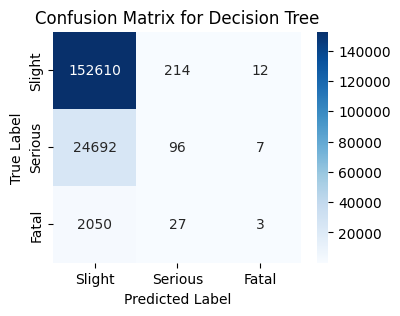

In [44]:
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_pred_mapped)
    print(f"{model_name} Confusion Matrix:\n{cm}")

    # Plot the confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Slight', 'Serious', 'Fatal'],
                yticklabels=['Slight', 'Serious', 'Fatal'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Store evaluation results in the dictionary
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'best_params': best_params,
    }

#Save the Model

In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)  # assuming X_train is your training features

# Now save the scaler and model after fitting
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the trained model
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)



#Load & Predict

In [47]:
import pickle
import numpy as np

# Step 1: Load the trained model and the scaler
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Step 2: Define a function to get user input
def get_user_input():
    print("Enter the following inputs:")
    longitude = float(input("Enter Longitude: "))
    latitude = float(input("Enter Latitude: "))
    number_of_vehicles = int(input("Enter Number_of_Vehicles: "))
    number_of_casualties = int(input("Enter Number_of_Casualties: "))
    day_of_week = int(input("Enter Day_of_Week: "))
    local_authority_district = int(input("Enter Local_Authority_(District): "))
    speed_limit = int(input("Enter Speed_limit: "))
    light_conditions = int(input("Enter Light_Conditions: "))
    weather_conditions = int(input("Enter Weather_Conditions: "))
    road_surface_conditions = int(input("Enter Road_Surface_Conditions: "))
    special_conditions_at_site = int(input("Enter Special_Conditions_at_Site: "))
    urban_or_rural_area = int(input("Enter Urban_or_Rural_Area: "))

    return np.array([[longitude, latitude, number_of_vehicles, number_of_casualties,
                      day_of_week, local_authority_district, speed_limit,
                      light_conditions, weather_conditions, road_surface_conditions,
                      special_conditions_at_site, urban_or_rural_area]])

# Step 3: Get user input and make a prediction
user_input = get_user_input()

# Scale the input using the loaded scaler
user_input_scaled = scaler.transform(user_input)

# Make a prediction
prediction = best_model.predict(user_input_scaled)

# Map the prediction to severity levels
severity_mapping = {0: 'Slight', 1: 'Serious', 2: 'Fatal'}
predicted_severity = severity_mapping[prediction[0]]

# Display the prediction
print(f"The predicted accident severity is: {predicted_severity}")


Enter the following inputs:
Enter Longitude: -0.199248
Enter Latitude: 51.514399
Enter Number_of_Vehicles: 4
Enter Number_of_Casualties: 3
Enter Day_of_Week: 2
Enter Local_Authority_(District): 12
Enter Speed_limit: 30
Enter Light_Conditions: 2
Enter Weather_Conditions: 3
Enter Road_Surface_Conditions: 2
Enter Special_Conditions_at_Site: 1
Enter Urban_or_Rural_Area: 1
The predicted accident severity is: Fatal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
